## This script can be used to calculate Wet Bulb Globe Temperature (WBGT) using standard meteorological outputs from WRF model. In particular this notebook corresponds to Fig. 6 (c, d) in the published paper.

* The calculations are done using Thermofeel library which is developed by ECMWF. To know more about Thermofeel, feel free to read the paper below:
https://www.sciencedirect.com/science/article/pii/S2352711022000176#b18


* Thermofeel documentation is here:
https://thermofeel.readthedocs.io/en/latest/?

* Also a pdf of the documention can be found here:
https://thermofeel.readthedocs.io/_/downloads/en/latest/pdf/

* The Github repository of Thermofeel is located here:
https://github.com/ecmwf/thermofeel


In [ ]:
#These are all the libraries you will need to use this notebook

!pip install thermofeel
!pip install netCDF4
import thermofeel
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import thermofeel as tf

In [ ]:
# Read model output data to be used in Thermofeel
# first for no-irrigation runs

import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)


# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_aug_sensor = rh_20[168:912, :, :]; del rh_20;#
rh_20_aug_sensor = shift(rh_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_aug_sensor.shape)

# Read NetCDF file for dew point temperature at 2m
td_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m.nc')
td_20 = td_dataset['td2m'][:]; del td_dataset;
print(td_20.shape)
td_20_aug_sensor = td_20[168:912, :, :]; del td_20;#
td_20_aug_sensor = shift(td_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(td_20_aug_sensor.shape)

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_aug_sensor = T2_20[168:912, :, :]; del T2_20;#
T2_20_aug_sensor = shift(T2_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_aug_sensor.shape)

# now read wind speed data

u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_aug_sensor = u_20[168:912, :, :]; del u_20;#
u_20_20_aug_sensor = shift(u_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_aug_sensor.shape)

v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_aug_sensor = v_20[168:912, :, :]; del v_20;#
v_20_20_aug_sensor = shift(v_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_aug_sensor.shape)

ws_20_aug_sensor = np.sqrt(u_20_20_aug_sensor**2+v_20_20_aug_sensor**2);

# Now read radiation fields

coszen_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
coszen_20 = coszen_dataset['coszen'][:]; del coszen_dataset;
print(coszen_20.shape)
coszen_20_aug_sensor = coszen_20[168:912, :, :]; del coszen_20;#
coszen_20_aug_sensor = shift(coszen_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(coszen_20_aug_sensor.shape)

swdown_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
swdown_20 = swdown_dataset['swdown'][:]; del swdown_dataset;
print(swdown_20.shape)
swdown_20_aug_sensor = swdown_20[168:912, :, :]; del swdown_20;#
swdown_20_aug_sensor = shift(swdown_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swdown_20_aug_sensor.shape)

glw_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
glw_20 = glw_dataset['glw'][:]; del glw_dataset;
print(glw_20.shape)
glw_20_aug_sensor = glw_20[168:912, :, :]; del glw_20;#
glw_20_aug_sensor = shift(glw_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(glw_20_aug_sensor.shape)

swddir_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
swddir_20 = swddir_dataset['swddir'][:]; del swddir_dataset;
print(swddir_20.shape)
swddir_20_aug_sensor = swddir_20[168:912, :, :]; del swddir_20;#
swddir_20_aug_sensor = shift(swddir_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddir_20_aug_sensor.shape)

swddni_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
swddni_20 = swddni_dataset['swddni'][:]; del swddni_dataset;
print(swddni_20.shape)
swddni_20_aug_sensor = swddni_20[168:912, :, :]; del swddni_20;#
swddni_20_aug_sensor = shift(swddni_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddni_20_aug_sensor.shape)

swupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
swupb_20 = swupb_dataset['swupb'][:]; del swupb_dataset;
print(swupb_20.shape)
swupb_20_aug_sensor = swupb_20[168:912, :, :]; del swupb_20;#
swupb_20_aug_sensor = shift(swupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swupb_20_aug_sensor.shape)

lwupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new.nc')
lwupb_20 = lwupb_dataset['lwupb'][:]; del lwupb_dataset;
print(lwupb_20.shape)
lwupb_20_aug_sensor = lwupb_20[168:912, :, :]; del lwupb_20;#
lwupb_20_aug_sensor = shift(lwupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(lwupb_20_aug_sensor.shape)


# Calculation the net radiation fields required, which are input to GT/WBGT

ssr = swdown_20_aug_sensor-swupb_20_aug_sensor # surface net solar radiation
strr = glw_20_aug_sensor-lwupb_20_aug_sensor # surface net thermal radiation

ssrd = swdown_20_aug_sensor;
dsrp = swddni_20_aug_sensor;
strd = glw_20_aug_sensor;
fdir = swddir_20_aug_sensor;
cossza = coszen_20_aug_sensor;
td_k = td_20_aug_sensor;
t2_k = T2_20_aug_sensor;
va = ws_20_aug_sensor;
rh = rh_20_aug_sensor

print(np.max(cossza))
print(np.min(cossza))

In [ ]:
#Check the availability of thermofeel functions and import them
print(dir(thermofeel))

# import the required thermofeel functions

from thermofeel import (
    calculate_apparent_temperature,
    calculate_bgt,
    calculate_heat_index_adjusted,
    calculate_heat_index_simplified,
    calculate_humidex,
    calculate_mean_radiant_temperature,
    calculate_mrt_from_bgt,
    calculate_normal_effective_temperature,
    calculate_relative_humidity_percent,
    calculate_saturation_vapour_pressure,
    calculate_utci,
    calculate_wbgt_simple,
    calculate_wbgt,
    calculate_wbgt_simple,
    calculate_wbt,
    calculate_wind_chill,
    kelvin_to_celsius,
    kelvin_to_fahrenheit,
    approximate_dsrp,
    helpers,
)

# Now calculate WBGT parameters for no-irrigation runs

# To calculate WBGT, we neet WBT (we bulb temperature), GT (globe temperature) and dry-bulb temperature (2-m air temp.)

# First Calculate WBT

tw_k = calculate_wbt(t2_k, rh)

# convert to F for plotting
tw_f = kelvin_to_fahrenheit(tw_k)

# convert to C for the use in WBGT
tw_c = kelvin_to_celsius(tw_k)
print('tw_c')
print(np.nanmax(tw_c))
print(np.nanmin(tw_c))


# Now calculate mean radiant temperature (mrt) because it is an input for calculating the Black Globe Temperature (bgt)
# this is necessary since black globe temperature is not commonly available. It should be in K

mrt = calculate_mean_radiant_temperature(ssrd=ssrd, ssr=ssr, dsrp=dsrp, strd=strd, fdir=fdir, strr=strr, cossza=cossza)
print('mrt')
print(np.nanmax(mrt))
print(np.nanmin(mrt))

# Now calculate Black Globe Temperature using the above-calculated MRT and then calculate WBGT

import math

from thermofeel.helpers import (celsius_to_kelvin, fahrenheit_to_kelvin, kelvin_to_celsius, kelvin_to_fahrenheit)

#converting to float128 was needed to avoid a warning in calculating bgt because there are so many smaller terms in the equation

t2_k = np.float128(t2_k)
mrt = np.float128(mrt)
va = np.float128(va)

bgt_k = calculate_bgt(t2_k, mrt, va)
print('bgt_k')
print(np.nanmax(bgt_k))
print(np.nanmin(bgt_k))

# Convert bgt from C to F for plotting
bgt_f = kelvin_to_fahrenheit(bgt_k)

#convert bgt in Kelvin to Celsius to be used in WBGT
bgt_c = kelvin_to_celsius(bgt_k)

# convert 2-m air temperature from Kelvin to F for plotting
t2_f = kelvin_to_fahrenheit(t2_k)

# convert 2-m air temperature from Kelvin to Celsius to be used in WBGT
t2_c = kelvin_to_celsius(t2_k)

# Now calculate WBGT

wbgt = 0.7 * tw_c + 0.2 * bgt_c + 0.1 * t2_c
wbgt_k = celsius_to_kelvin(wbgt)

wbgt_f = kelvin_to_fahrenheit(wbgt_k)

wbgt_f_reshape_aug_noirr = np.reshape(wbgt, (24, 31, 171, 162), order='F');
del wbgt_f;


In [ ]:
# Read model output data to be used in Thermofeel
# now for irrigation runs

import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)


# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m_irr.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_aug_sensor = rh_20[168:912, :, :]; del rh_20;#
rh_20_aug_sensor = shift(rh_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_aug_sensor.shape)

# Read NetCDF file for dew point temperature at 2m
td_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m_irr.nc')
td_20 = td_dataset['td2m'][:]; del td_dataset;
print(td_20.shape)
td_20_aug_sensor = td_20[168:912, :, :]; del td_20;#
td_20_aug_sensor = shift(td_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(td_20_aug_sensor.shape)

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_aug_sensor = T2_20[168:912, :, :]; del T2_20;#
T2_20_aug_sensor = shift(T2_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_aug_sensor.shape)

# now read wind speed data

u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_aug_sensor = u_20[168:912, :, :]; del u_20;#
u_20_20_aug_sensor = shift(u_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_aug_sensor.shape)

v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_aug_sensor = v_20[168:912, :, :]; del v_20;#
v_20_20_aug_sensor = shift(v_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_aug_sensor.shape)

ws_20_aug_sensor = np.sqrt(u_20_20_aug_sensor**2+v_20_20_aug_sensor**2);

# Now read radiation fields

coszen_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
coszen_20 = coszen_dataset['coszen'][:]; del coszen_dataset;
print(coszen_20.shape)
coszen_20_aug_sensor = coszen_20[168:912, :, :]; del coszen_20;#
coszen_20_aug_sensor = shift(coszen_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(coszen_20_aug_sensor.shape)

swdown_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swdown_20 = swdown_dataset['swdown'][:]; del swdown_dataset;
print(swdown_20.shape)
swdown_20_aug_sensor = swdown_20[168:912, :, :]; del swdown_20;#
swdown_20_aug_sensor = shift(swdown_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swdown_20_aug_sensor.shape)

glw_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
glw_20 = glw_dataset['glw'][:]; del glw_dataset;
print(glw_20.shape)
glw_20_aug_sensor = glw_20[168:912, :, :]; del glw_20;#
glw_20_aug_sensor = shift(glw_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(glw_20_aug_sensor.shape)

swddir_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swddir_20 = swddir_dataset['swddir'][:]; del swddir_dataset;
print(swddir_20.shape)
swddir_20_aug_sensor = swddir_20[168:912, :, :]; del swddir_20;#
swddir_20_aug_sensor = shift(swddir_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddir_20_aug_sensor.shape)

swddni_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swddni_20 = swddni_dataset['swddni'][:]; del swddni_dataset;
print(swddni_20.shape)
swddni_20_aug_sensor = swddni_20[168:912, :, :]; del swddni_20;#
swddni_20_aug_sensor = shift(swddni_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddni_20_aug_sensor.shape)

swupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swupb_20 = swupb_dataset['swupb'][:]; del swupb_dataset;
print(swupb_20.shape)
swupb_20_aug_sensor = swupb_20[168:912, :, :]; del swupb_20;#
swupb_20_aug_sensor = shift(swupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swupb_20_aug_sensor.shape)

lwupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
lwupb_20 = lwupb_dataset['lwupb'][:]; del lwupb_dataset;
print(lwupb_20.shape)
lwupb_20_aug_sensor = lwupb_20[168:912, :, :]; del lwupb_20;#
lwupb_20_aug_sensor = shift(lwupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(lwupb_20_aug_sensor.shape)


# Calculation the net radiation fields required, which are input to GT/WBGT

ssr = swdown_20_aug_sensor-swupb_20_aug_sensor # surface net solar radiation
strr = glw_20_aug_sensor-lwupb_20_aug_sensor # surface net thermal radiation

ssrd = swdown_20_aug_sensor;
dsrp = swddni_20_aug_sensor;
strd = glw_20_aug_sensor;
fdir = swddir_20_aug_sensor;
cossza = coszen_20_aug_sensor;
td_k = td_20_aug_sensor;
t2_k = T2_20_aug_sensor;
va = ws_20_aug_sensor;
rh = rh_20_aug_sensor

print(np.max(cossza))
print(np.min(cossza))


In [ ]:
# now calculate WBGT parameters for irrigation runs

# To calculate WBGT, we neet WBT (we bulb temperature), GT (globe temperature) and dry-bulb temperature (2-m air temp.)

# First Calculate WBT

tw_k = calculate_wbt(t2_k, rh)

# convert to F for plotting
tw_f = kelvin_to_fahrenheit(tw_k)

# convert to C for the use in WBGT
tw_c = kelvin_to_celsius(tw_k)
print('tw_c')
print(np.nanmax(tw_c))
print(np.nanmin(tw_c))


# Now calculate mean radiant temperature (mrt) because it is an input for calculating the Black Globe Temperature (bgt)
# this is necessary since black globe temperature is not commonly available. It should be in K

mrt = calculate_mean_radiant_temperature(ssrd=ssrd, ssr=ssr, dsrp=dsrp, strd=strd, fdir=fdir, strr=strr, cossza=cossza)
print('mrt')
print(np.nanmax(mrt))
print(np.nanmin(mrt))

# Now calculate Black Globe Temperature using the above-calculated MRT and then calculate WBGT

import math

from thermofeel.helpers import (celsius_to_kelvin, fahrenheit_to_kelvin, kelvin_to_celsius, kelvin_to_fahrenheit)

#converting to float128 was needed to avoid a warning in calculating bgt because there are so many smaller terms in the equation

t2_k = np.float128(t2_k)
mrt = np.float128(mrt)
va = np.float128(va)

bgt_k = calculate_bgt(t2_k, mrt, va)
print('bgt_k')
print(np.nanmax(bgt_k))
print(np.nanmin(bgt_k))

# Convert bgt from C to F for plotting
bgt_f = kelvin_to_fahrenheit(bgt_k)

#convert bgt in Kelvin to Celsius to be used in WBGT
bgt_c = kelvin_to_celsius(bgt_k)

# convert 2-m air temperature from Kelvin to F for plotting
t2_f = kelvin_to_fahrenheit(t2_k)

# convert 2-m air temperature from Kelvin to Celsius to be used in WBGT
t2_c = kelvin_to_celsius(t2_k)

# Now calculate WBGT

wbgt = 0.7 * tw_c + 0.2 * bgt_c + 0.1 * t2_c
wbgt_k = celsius_to_kelvin(wbgt)

wbgt_f = kelvin_to_fahrenheit(wbgt_k)

# calculate max and average

wbgt_f_reshape_aug_irr = np.reshape(wbgt, (24, 31, 171, 162), order='F');
del wbgt_f;

In [ ]:
# calculate difference of wbgt separately for day and night

#first for irrigation run

wbgt_f_diurnal_aug_day_sensor_irr = wbgt_f_reshape_aug_irr[7:19, :, :, :];
wbgt_f_diurnal_aug_night_sensor_irr = wbgt_f_reshape_aug_irr[np.r_[0:7, 19:24], :, :, :];

wbgt_f_reshape_aug_irr_time_points_day = np.reshape(wbgt_f_diurnal_aug_day_sensor_irr, (372, 27702), order='F');
wbgt_f_reshape_aug_irr_time_points_night = np.reshape(wbgt_f_diurnal_aug_night_sensor_irr, (372, 27702), order='F');


wbgt_f_diurnal_aug_day_sensor_mn_irr = np.nanmean(wbgt_f_diurnal_aug_day_sensor_irr, axis=0);
wbgt_f_diurnal_aug_day_sensor_mn_mon_irr = np.nanmean(wbgt_f_diurnal_aug_day_sensor_mn_irr, axis=0);

wbgt_f_diurnal_aug_night_sensor_mn_irr = np.nanmean(wbgt_f_diurnal_aug_night_sensor_irr, axis=0);
wbgt_f_diurnal_aug_night_sensor_mn_mon_irr = np.nanmean(wbgt_f_diurnal_aug_night_sensor_mn_irr, axis=0);

# now for no-irrigation run

wbgt_f_diurnal_aug_day_sensor_noirr = wbgt_f_reshape_aug_noirr[7:19, :, :, :];
wbgt_f_diurnal_aug_night_sensor_noirr = wbgt_f_reshape_aug_noirr[np.r_[0:7, 19:24], :, :, :];

wbgt_f_reshape_aug_noirr_time_points_day = np.reshape(wbgt_f_diurnal_aug_day_sensor_noirr, (372, 27702), order='F');
wbgt_f_reshape_aug_noirr_time_points_night = np.reshape(wbgt_f_diurnal_aug_night_sensor_noirr, (372, 27702), order='F');

wbgt_f_diurnal_aug_day_sensor_mn_noirr = np.nanmean(wbgt_f_diurnal_aug_day_sensor_noirr, axis=0);
wbgt_f_diurnal_aug_day_sensor_mn_mon_noirr = np.nanmean(wbgt_f_diurnal_aug_day_sensor_mn_noirr, axis=0);

wbgt_f_diurnal_aug_night_sensor_mn_noirr = np.nanmean(wbgt_f_diurnal_aug_night_sensor_noirr, axis=0);
wbgt_f_diurnal_aug_night_sensor_mn_mon_noirr = np.nanmean(wbgt_f_diurnal_aug_night_sensor_mn_noirr, axis=0);

wbgt_f_diff_diff_day = wbgt_f_diurnal_aug_day_sensor_mn_mon_irr-wbgt_f_diurnal_aug_day_sensor_mn_mon_noirr;
wbgt_f_diff_diff_night = wbgt_f_diurnal_aug_night_sensor_mn_mon_irr-wbgt_f_diurnal_aug_night_sensor_mn_mon_noirr;



# Counting positive and negative values for day

positive_count_day = np.sum(wbgt_f_diff_diff_day.flatten() > 0)
negative_count_day = np.sum(wbgt_f_diff_diff_day.flatten() < 0)
total_count_day = len(wbgt_f_diff_diff_day.flatten())

# Calculating percentages
positive_percentage_day = (positive_count_day / total_count_day) * 100
negative_percentage_day = (negative_count_day / total_count_day) * 100

print (positive_percentage_day)
print (negative_percentage_day)

# Counting positive and negative values for night


positive_count_night = np.sum(wbgt_f_diff_diff_night.flatten() > 0)
negative_count_night = np.sum(wbgt_f_diff_diff_night.flatten() < 0)
total_count_night = len(wbgt_f_diff_diff_night.flatten())

# Calculating percentages
positive_percentage_night = (positive_count_night / total_count_night) * 100
negative_percentage_night = (negative_count_night / total_count_night) * 100

print (positive_percentage_night)
print (negative_percentage_night)

61.01364522417154
38.98635477582846
70.57974153490723
29.420258465092775


In [ ]:

# calculate statistical significance

import numpy as np
from scipy import stats

wbgt_f_reshape_aug_irr_time_points_day = wbgt_f_reshape_aug_irr_time_points_day.astype(float) # earlier data was converted to float128
wbgt_f_reshape_aug_irr_time_points_night = wbgt_f_reshape_aug_irr_time_points_night.astype(float) # earlier data was converted to float128


wbgt_f_reshape_aug_noirr_time_points_day = wbgt_f_reshape_aug_noirr_time_points_day.astype(float) # earlier data was converted to float128
wbgt_f_reshape_aug_noirr_time_points_night = wbgt_f_reshape_aug_noirr_time_points_night.astype(float) # earlier data was converted to float128


wbgt_diff_sig_day = np.zeros((27702, 1))
wbgt_diff_sig_night = np.zeros((27702, 1))

# day
for i in range(27702):
    # Exclude NaN values from the analysis
    valid_indices_day = np.logical_and(~np.isnan(wbgt_f_reshape_aug_noirr_time_points_day[:, i]), ~np.isnan(wbgt_f_reshape_aug_irr_time_points_day[:, i]))
    res_day = stats.ttest_ind(wbgt_f_reshape_aug_noirr_time_points_day[valid_indices_day, i], wbgt_f_reshape_aug_irr_time_points_day[valid_indices_day, i])
    wbgt_diff_sig_day[i] = res_day.pvalue

wbgt_diff_sig_reshape_day = np.reshape(wbgt_diff_sig_day, (171, 162), order='F')
p_value_mask_day = wbgt_diff_sig_reshape_day <= 0.1
significant_lat_day = lat[p_value_mask_day]
significant_lon_day = lon[p_value_mask_day]

# night
for i in range(27702):
    # Exclude NaN values from the analysis
    valid_indices_night = np.logical_and(~np.isnan(wbgt_f_reshape_aug_noirr_time_points_night[:, i]), ~np.isnan(wbgt_f_reshape_aug_irr_time_points_night[:, i]))
    res_night = stats.ttest_ind(wbgt_f_reshape_aug_noirr_time_points_night[valid_indices_night, i], wbgt_f_reshape_aug_irr_time_points_night[valid_indices_night, i])
    wbgt_diff_sig_night[i] = res_night.pvalue

wbgt_diff_sig_reshape_night = np.reshape(wbgt_diff_sig_night, (171, 162), order='F')
p_value_mask_night = wbgt_diff_sig_reshape_night <= 0.1
significant_lat_night = lat[p_value_mask_night]
significant_lon_night = lon[p_value_mask_night]


In [ ]:
# count no. of grids with positive and negative difference where p values is less than 0.1
import numpy as np
#day
count_positive_pvalue_day = np.count_nonzero((wbgt_f_diff_diff_day > 0) & (wbgt_diff_sig_reshape_day < 0.10))
count_negative_pvalue_day = np.count_nonzero((wbgt_f_diff_diff_day < 0) & (wbgt_diff_sig_reshape_day < 0.10))

print('Positive values with p-value day < 0.10:', count_positive_pvalue_day)
print('Negative values with p-value day < 0.10:', count_negative_pvalue_day)

#night
count_positive_pvalue_night = np.count_nonzero((wbgt_f_diff_diff_night > 0) & (wbgt_diff_sig_reshape_night < 0.10))
count_negative_pvalue_night = np.count_nonzero((wbgt_f_diff_diff_night < 0) & (wbgt_diff_sig_reshape_night < 0.10))

print('Positive values with p-value night < 0.10:', count_positive_pvalue_night)
print('Negative values with p-value night < 0.10:', count_negative_pvalue_night)

Positive values with p-value day < 0.10: 0
Negative values with p-value day < 0.10: 1394
Positive values with p-value night < 0.10: 1469
Negative values with p-value night < 0.10: 27


In [ ]:
# calculate average increase or decrease considering only significant areas
import numpy as np

# For day
day_positive_mask = (wbgt_f_diff_diff_day > 0) & (wbgt_diff_sig_reshape_day < 0.10)
day_negative_mask = (wbgt_f_diff_diff_day < 0) & (wbgt_diff_sig_reshape_day < 0.10)

day_positive_values = wbgt_f_diff_diff_day[day_positive_mask]
day_negative_values = wbgt_f_diff_diff_day[day_negative_mask]

day_positive_avg = np.mean(day_positive_values) if len(day_positive_values) > 0 else 0
day_negative_avg = np.mean(day_negative_values) if len(day_negative_values) > 0 else 0

day_positive_min = np.min(day_positive_values) if len(day_positive_values) > 0 else 0
day_positive_max = np.max(day_positive_values) if len(day_positive_values) > 0 else 0
day_negative_min = np.min(day_negative_values) if len(day_negative_values) > 0 else 0
day_negative_max = np.max(day_negative_values) if len(day_negative_values) > 0 else 0

print('Day - Positive values with p-value day < 0.10:')
print('  Average:', day_positive_avg)
print('  Minimum:', day_positive_min)
print('  Maximum:', day_positive_max)

print('Day - Negative values with p-value day < 0.10:')
print('  Average:', day_negative_avg)
print('  Minimum:', day_negative_min)
print('  Maximum:', day_negative_max)

# For night
night_positive_mask = (wbgt_f_diff_diff_night > 0) & (wbgt_diff_sig_reshape_night < 0.10)
night_negative_mask = (wbgt_f_diff_diff_night < 0) & (wbgt_diff_sig_reshape_night < 0.10)

night_positive_values = wbgt_f_diff_diff_night[night_positive_mask]
night_negative_values = wbgt_f_diff_diff_night[night_negative_mask]

night_positive_avg = np.mean(night_positive_values) if len(night_positive_values) > 0 else 0
night_negative_avg = np.mean(night_negative_values) if len(night_negative_values) > 0 else 0

night_positive_min = np.min(night_positive_values) if len(night_positive_values) > 0 else 0
night_positive_max = np.max(night_positive_values) if len(night_positive_values) > 0 else 0
night_negative_min = np.min(night_negative_values) if len(night_negative_values) > 0 else 0
night_negative_max = np.max(night_negative_values) if len(night_negative_values) > 0 else 0

print('Night - Positive values with p-value night < 0.10:')
print('  Average:', night_positive_avg)
print('  Minimum:', night_positive_min)
print('  Maximum:', night_positive_max)

print('Night - Negative values with p-value night < 0.10:')
print('  Average:', night_negative_avg)
print('  Minimum:', night_negative_min)
print('  Maximum:', night_negative_max)


Day - Positive values with p-value day < 0.10:
  Average: 0
  Minimum: 0
  Maximum: 0
Day - Negative values with p-value day < 0.10:
  Average: -0.6095592890093750539
  Minimum: -1.319050450968813782
  Maximum: -0.26166882045868474285
Night - Positive values with p-value night < 0.10:
  Average: 0.64562023000030373357
  Minimum: 0.38967119901890010132
  Maximum: 1.3385030194867560301
Night - Negative values with p-value night < 0.10:
  Average: -0.4763092551486376514
  Minimum: -0.80967530562505552263
  Maximum: -0.33192024273783549831


In [ ]:
# prepare for plotting

!pip install cartopy
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import MultipleLocator

# Load the county and lake shapefiles
counties = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
salton = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/Salton_geog/Salton_geog.shp")


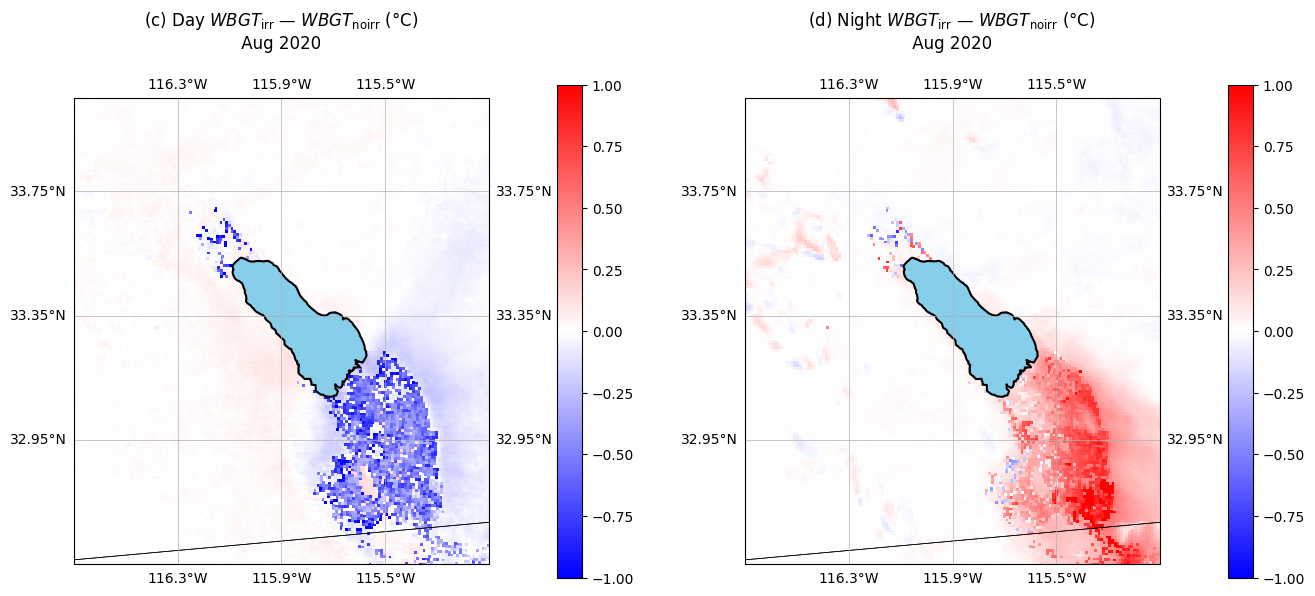

In [ ]:
# plot daily mean difference day and night without significance

fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.18, hspace=0.3)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_f_diff_diff_day, cmap='bwr', vmin=-1, vmax=1)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(c) Day $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0C) \n Aug 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_f_diff_diff_night, cmap='bwr', vmin=-1, vmax=1)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(d) Night $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0C) \n Aug 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)



plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_diff_irr_av_aug_nosig.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()



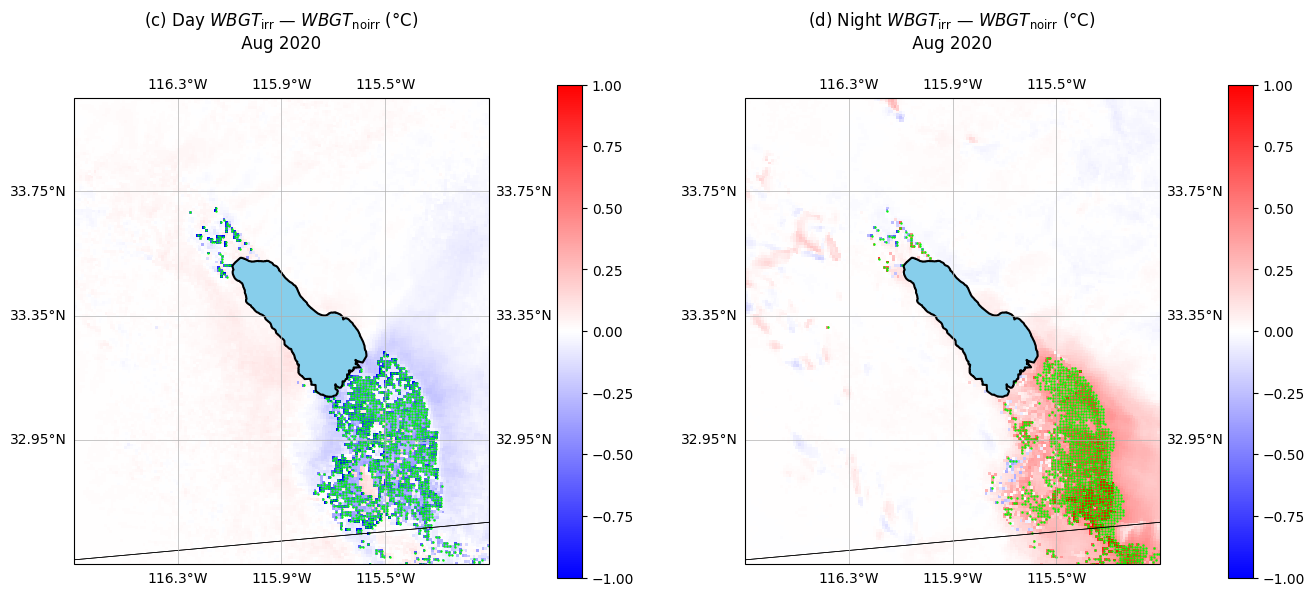

In [ ]:
# plot daily mean difference day and night with significance

fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.18, hspace=0.3)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_f_diff_diff_day, cmap='bwr', vmin=-1, vmax=1)
ax_1.scatter(significant_lon_day, significant_lat_day, s=2, c='lime', marker='.', alpha=1, facecolors='lime') # this is to plot significant dots if needed
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(c) Day $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0C) \n Aug 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_f_diff_diff_night, cmap='bwr', vmin=-1, vmax=1)
ax_2.scatter(significant_lon_night, significant_lat_night, s=2, c='lime', marker='.', alpha=1, facecolors='lime') # this is to plot significant dots if needed
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(d) Night $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0C) \n Aug 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)



plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_diff_irr_av_aug_withsig.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()



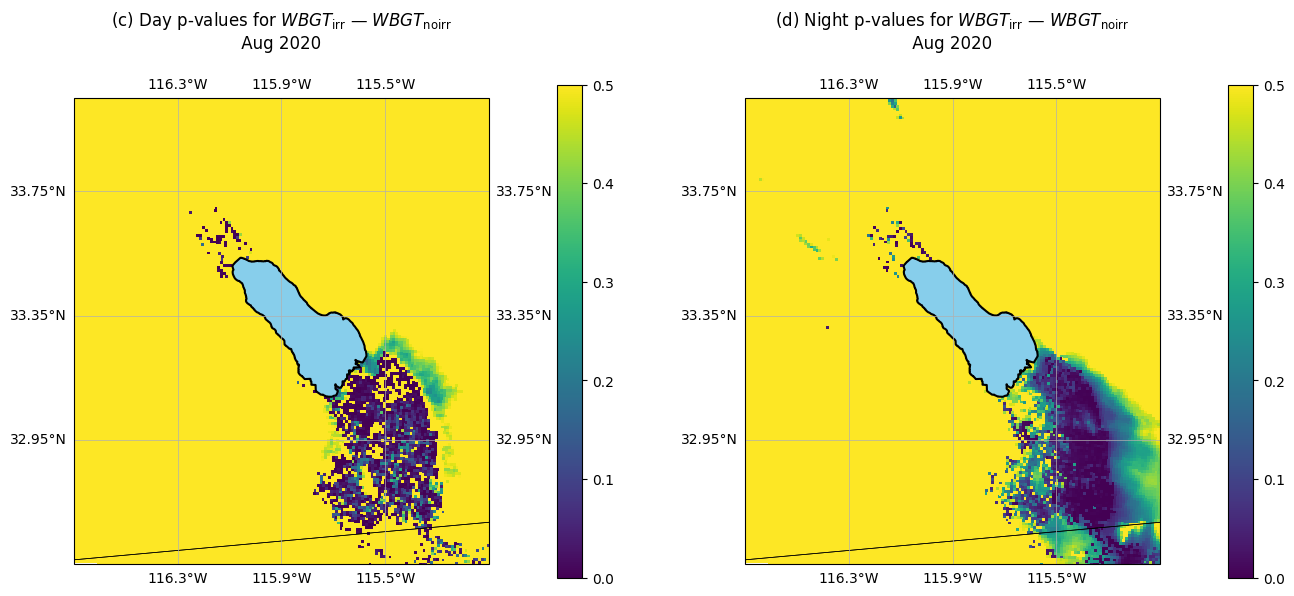

In [ ]:
# plot day night difference p values


fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.18, hspace=0.3)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_diff_sig_reshape_day, vmin=0, vmax=0.5)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(c) Day p-values for $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ \n Aug 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_diff_sig_reshape_night, vmin=0, vmax=0.5)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(d) Night p-values for $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ \n Aug 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)


#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_diff_irr_av_aug_sig.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()

